In [2]:
import xmitgcm as xm
import matplotlib.pyplot as plt
import cartopy as cartopy
import cartopy.crs as ccrs
import glob
import importlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from pathlib import Path
from pprint import pprint
import sys
import xarray as xr
import xgcm as xgcm
import warnings
from os.path import expanduser,join,isdir
import sys
user_home_dir = expanduser('~')
ecco_v4_py_dir = join(user_home_dir,'ECCOv4-py')
if isdir(ecco_v4_py_dir):
    sys.path.insert(0,ecco_v4_py_dir)
import ecco_v4_py as ecco
from ecco_v4_py import get_llc_grid as get_llc_grid
from ecco_v4_py import plot_proj_to_latlon_grid
import os

In [3]:
grd_dir='/efs_ecco/hvanderz/r5/WORKINGDIR/ECCOV4/release5_ToTs/run/'

new_grid_delta_lat = .5
new_grid_delta_lon = .5

new_grid_min_lat = -90
new_grid_max_lat = 90

new_grid_min_lon = -180
new_grid_max_lon = 180

months={1:'JAN',2:'FEB',3:'MAR',4:'APL',5:'MAY',6:'JUN',7:'JUL',8:'AUG',9:'SEP',10:'OCT',11:'NOV',12:'DEC'}
iters=[1464,2928,4392,5856,7320,8784,10248,11712,13176,14640,16104,17568]

In [4]:
# read mixed layer depth
data_dir='/efs_ecco/hvanderz/MXLDEPTH_mon_mean_tides/'
pre_data_dir='/efs_ecco/hvanderz/MXLDEPTH_mon_mean_notides/'
pre_ds_llc = xm.open_mdsdataset(pre_data_dir, grid_dir=grd_dir, geometry="llc",iters=iters,ref_date='1992-1-1 0:0:0',delta_t=1800)
ds_llc = xm.open_mdsdataset(data_dir, grid_dir=grd_dir, geometry="llc",iters=iters,ref_date='1992-1-1 0:0:0',delta_t=1800)
pre_ds_llc = pre_ds_llc.rename({'face':'tile'})
ds_llc = ds_llc.rename({'face':'tile'})

dates=ds_llc.time

In [5]:
# read sea ice area
SI_dir_tides='/efs_ecco/hvanderz/SIarea_mon_mean_tides/'
SI_dir_notides='/efs_ecco/hvanderz/SIarea_mon_mean_notides/'
si_ds=xm.open_mdsdataset(SI_dir_tides, grid_dir=grd_dir, geometry="llc",iters=iters,ref_date='1992-1-1 0:0:0',delta_t=1800)
pre_si_ds=xm.open_mdsdataset(SI_dir_notides, grid_dir=grd_dir, geometry="llc",iters=iters,ref_date='1992-1-1 0:0:0',delta_t=1800)
si_ds = si_ds.rename({'face':'tile'})
pre_si_ds = pre_si_ds.rename({'face':'tile'})
si=si_ds.SIarea
pre_si=pre_si_ds.SIarea

In [6]:
# calculate area mean of mixed layer depth with condition
MLD_Arctic_tides = ds_llc.MXLDEPTH.isel(tile=[2,5,6,7,10]).where((si_ds.SIarea>0)&(si_ds.SIarea<=.3)).mean(dim=('tile','i','j')).values
MLD_Arctic_notides = pre_ds_llc.MXLDEPTH.isel(tile=[2,5,6,7,10]).where((pre_si_ds.SIarea>0)&(pre_si_ds.SIarea<=.3)).mean(dim=('tile','i','j')).values
MLD_Antarctic_tides = ds_llc.MXLDEPTH.isel(tile=[0,3,9,12]).where((si_ds.SIarea>0)&(si_ds.SIarea<=.3)).mean(dim=('tile','i','j')).values
MLD_Antarctic_notides = pre_ds_llc.MXLDEPTH.isel(tile=[0,3,9,12]).where((pre_si_ds.SIarea>0)&(pre_si_ds.SIarea<=.3)).mean(dim=('tile','i','j')).values

In [7]:
# without condition
MLD_Arctic_tides_2 = ds_llc.MXLDEPTH.isel(tile=[2,5,6,7,10]).mean(dim=('tile','i','j')).values
MLD_Arctic_notides_2 = pre_ds_llc.MXLDEPTH.isel(tile=[2,5,6,7,10]).mean(dim=('tile','i','j')).values
MLD_Antarctic_tides_2 = ds_llc.MXLDEPTH.isel(tile=[0,3,9,12]).mean(dim=('tile','i','j')).values
MLD_Antarctic_notides_2 = pre_ds_llc.MXLDEPTH.isel(tile=[0,3,9,12]).mean(dim=('tile','i','j')).values

In [8]:
MLD_Arctic_tides

array([44.925022, 60.173946, 49.904243, 35.68352 , 17.800615, 12.301518,
       10.065073, 10.181258, 11.785075, 19.054718, 31.347029, 50.480816],
      dtype=float32)

In [9]:
MLD_Antarctic_tides

array([15.275437, 20.669226, 34.43285 , 45.752792, 58.27782 , 71.530365,
       77.61034 , 81.77023 , 86.994064, 56.03479 , 36.696945, 20.275976],
      dtype=float32)

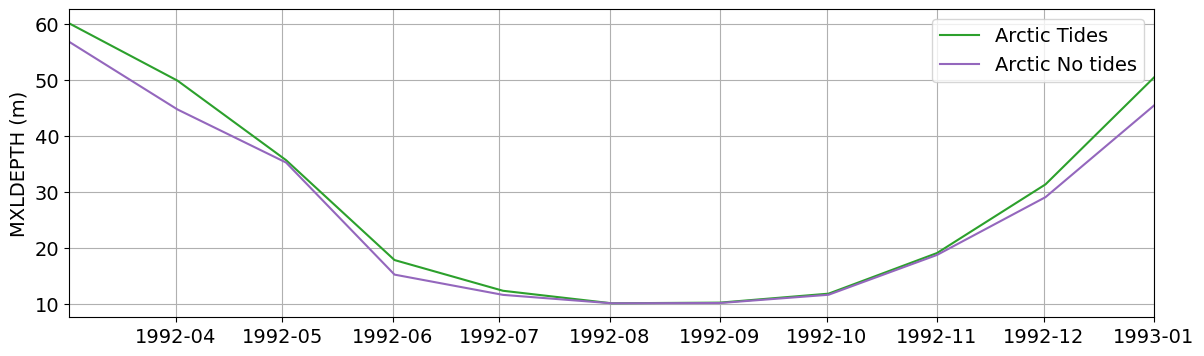

In [10]:
plt.figure(figsize=(14,4))
####### PLOT #######
## Arctic 
plt.plot(dates, MLD_Arctic_tides, c='tab:green', linestyle='-', label='Arctic Tides')
plt.plot(dates, MLD_Arctic_notides, c='tab:purple', linestyle='-', label='Arctic No tides')
## Antarctic 
#plt.plot(dates, MLD_Antarctic_tides, c='tab:green', linestyle='--',label='Antarctic Tides',alpha=0.7)
#plt.plot(dates, MLD_Antarctic_notides, c='tab:purple', linestyle='--',label='Antarctic No Tides')
####### PARAMS #######
plt.grid(True)
plt.legend(fontsize=14)
plt.tick_params(labelsize=14)
#plt.ylim(0,20)
plt.xlim(dates[1],dates[-1])
plt.ylabel("MXLDEPTH (m)", fontsize=14)
plt.show()

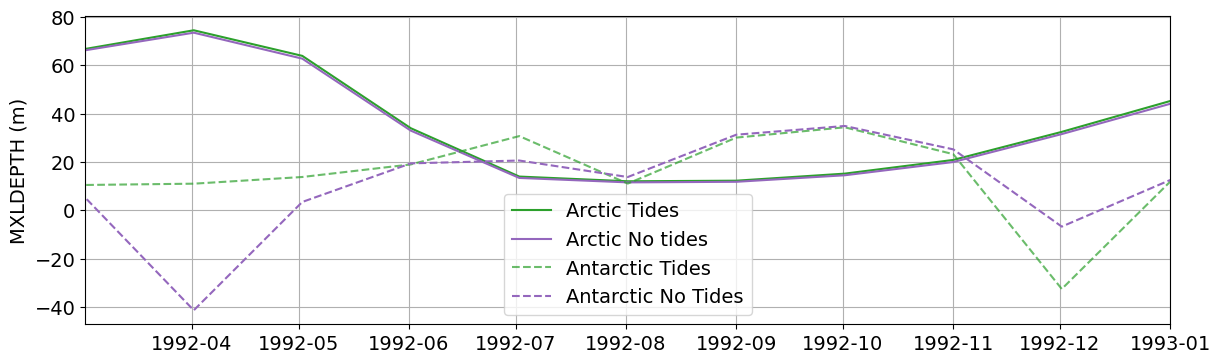

In [11]:
plt.figure(figsize=(14,4))
####### PLOT #######
## Arctic 
plt.plot(dates, MLD_Arctic_tides_2, c='tab:green', linestyle='-', label='Arctic Tides')
plt.plot(dates, MLD_Arctic_notides_2, c='tab:purple', linestyle='-', label='Arctic No tides')
## Antarctic 
plt.plot(dates, MLD_Antarctic_tides_2, c='tab:green', linestyle='--',label='Antarctic Tides',alpha=0.7)
plt.plot(dates, MLD_Antarctic_notides_2, c='tab:purple', linestyle='--',label='Antarctic No Tides')
####### PARAMS #######
plt.grid(True)
plt.legend(fontsize=14)
plt.tick_params(labelsize=14)
#plt.ylim(0,20)
plt.xlim(dates[1],dates[-1])
plt.ylabel("MXLDEPTH (m)", fontsize=14)
plt.show()

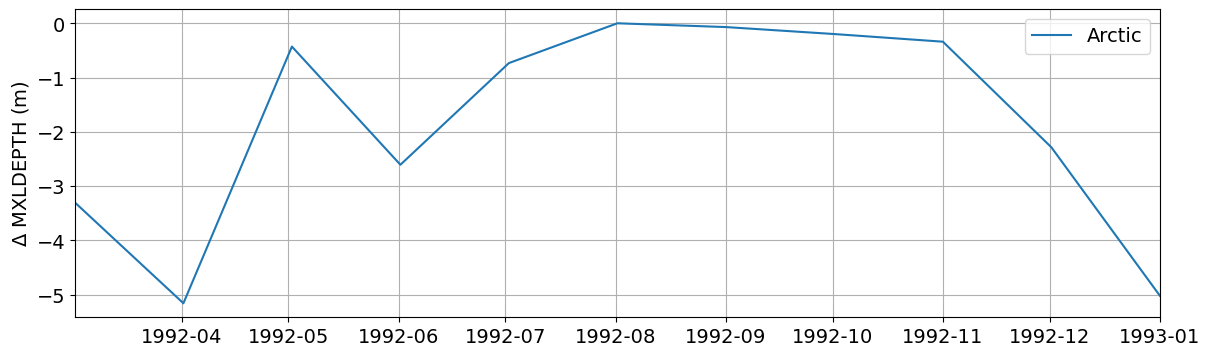

In [12]:
plt.figure(figsize=(14,4))
####### PLOT #######
## Arctic 
plt.plot(dates, MLD_Arctic_notides-MLD_Arctic_tides, c='tab:blue', linestyle='-', label='Arctic')
#plt.plot(dates, MLD_Antarctic_notides-MLD_Antarctic_tides, c='tab:red', linestyle='-', label='Antarctic')
####### PARAMS #######
plt.grid(True)
plt.legend(fontsize=14)
plt.tick_params(labelsize=14)
#plt.ylim(-.6,.6)
plt.xlim(dates[1],dates[-1])
plt.ylabel("$\\Delta$ MXLDEPTH (m)", fontsize=14)
plt.show()

In [48]:
# focusing on Apr 1992

In [49]:
# read mixed layer depth on Apr 1992
apr_mld_ds=xm.open_mdsdataset(data_dir, grid_dir=grd_dir, geometry="llc",iters=4392,ref_date='1992-1-1 0:0:0',delta_t=1800)
pre_apr_mld_ds=xm.open_mdsdataset(pre_data_dir, grid_dir=grd_dir, geometry="llc",iters=4392,ref_date='1992-1-1 0:0:0',delta_t=1800)
pre_apr_mld_ds = pre_apr_mld_ds.rename({'face':'tile'})
apr_mld_ds = apr_mld_ds.rename({'face':'tile'})
apr_mld=apr_mld_ds.MXLDEPTH
pre_apr_mld=pre_apr_mld_ds.MXLDEPTH

In [14]:
new_grid_lon_centers, new_grid_lat_centers,\
new_grid_lon_edges, new_grid_lat_edges,\
pre_latlon =\
        ecco.resample_to_latlon(pre_apr_mld_ds.XC, \
                                pre_apr_mld_ds.YC, \
                                pre_apr_mld.where(pre_apr_mld_ds.maskC[0]),\
                                new_grid_min_lat, new_grid_max_lat, new_grid_delta_lat,\
                                new_grid_min_lon, new_grid_max_lon, new_grid_delta_lon,\
                                fill_value = np.nan, \
                                mapping_method = 'nearest_neighbor',
                                radius_of_influence = 120000)

In [15]:
new_grid_lon_centers, new_grid_lat_centers,\
new_grid_lon_edges, new_grid_lat_edges,\
int_latlon =\
        ecco.resample_to_latlon(apr_mld_ds.XC, \
                                apr_mld_ds.YC, \
                                apr_mld.where(apr_mld_ds.maskC[0]),\
                                new_grid_min_lat, new_grid_max_lat, new_grid_delta_lat,\
                                new_grid_min_lon, new_grid_max_lon, new_grid_delta_lon,\
                                fill_value = np.nan, \
                                mapping_method = 'nearest_neighbor',
                                radius_of_influence = 120000)

In [50]:
diff=int_latlon-pre_latlon

Text(0.5, 1.0, 'mixed layer difference (meter)')

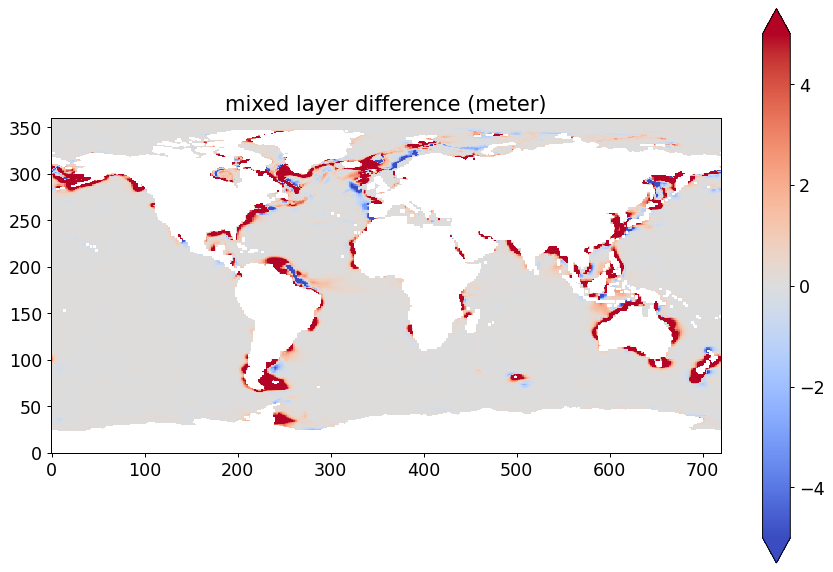

In [51]:
# plot difference for presentation
fig=plt.figure(figsize=(12,8), dpi= 90)
plt.rcParams['font.size']=14
ax3=fig.add_subplot(1,1,1)
m3=ax3.imshow(diff,origin='lower',vmin=-5,vmax=5,cmap='coolwarm')
cbar=fig.colorbar(m3,extend='both',orientation='vertical')
ax3.set_title('mixed layer difference (meter)')

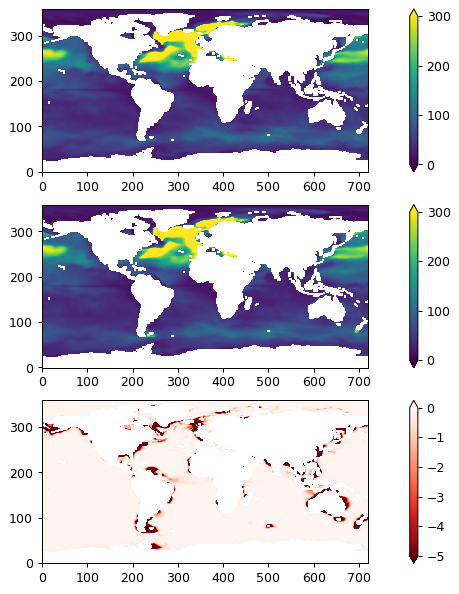

In [15]:
fig=plt.figure(figsize=(12,8), dpi= 90)
ax=fig.add_subplot(3,1,1)
m=ax.imshow(pre_latlon,origin='lower',vmax=300,vmin=0)
fig.colorbar(m,extend='both',orientation='vertical')
ax2=fig.add_subplot(3,1,2)
m2=ax2.imshow(int_latlon,origin='lower',vmax=300,vmin=0)
fig.colorbar(m2,extend='both',orientation='vertical')
ax3=fig.add_subplot(3,1,3)
m3=ax3.imshow(diff,origin='lower',vmin=-5,vmax=0,cmap='Reds_r')
fig.colorbar(m3,extend='both',orientation='vertical')
#cbar_ax=fig.add_axes([0.93,0.09,0.02,0.8])

In [16]:
SI_dir_tides='/efs_ecco/hvanderz/SIheff_mon_mean_tides/'
SI_dir_notides='/efs_ecco/hvanderz/SIheff_mon_mean_notides/'
si_ds=xm.open_mdsdataset(SI_dir_tides, grid_dir=grd_dir, geometry="llc",iters=iters,ref_date='1992-1-1 0:0:0',delta_t=1800)
pre_si_ds=xm.open_mdsdataset(SI_dir_notides, grid_dir=grd_dir, geometry="llc",iters=iters,ref_date='1992-1-1 0:0:0',delta_t=1800)
si_ds = si_ds.rename({'face':'tile'})
pre_si_ds = pre_si_ds.rename({'face':'tile'})
si=si_ds.SIheff
pre_si=pre_si_ds.SIheff

new_grid_lon_centers, new_grid_lat_centers,\
new_grid_lon_edges, new_grid_lat_edges,\
si_pre_latlon =\
        ecco.resample_to_latlon(pre_si_ds.XC, \
                                pre_si_ds.YC, \
                                pre_si.where(pre_si_ds.maskC[0]),\
                                new_grid_min_lat, new_grid_max_lat, new_grid_delta_lat,\
                                new_grid_min_lon, new_grid_max_lon, new_grid_delta_lon,\
                                fill_value = np.nan, \
                                mapping_method = 'nearest_neighbor',
                                radius_of_influence = 120000)
new_grid_lon_centers, new_grid_lat_centers,\
new_grid_lon_edges, new_grid_lat_edges,\
si_int_latlon =\
        ecco.resample_to_latlon(si_ds.XC, \
                                si_ds.YC, \
                                si.where(si_ds.maskC[0]),\
                                new_grid_min_lat, new_grid_max_lat, new_grid_delta_lat,\
                                new_grid_min_lon, new_grid_max_lon, new_grid_delta_lon,\
                                fill_value = np.nan, \
                                mapping_method = 'nearest_neighbor',
                                radius_of_influence = 120000)
si_diff=si_pre_latlon-si_int_latlon

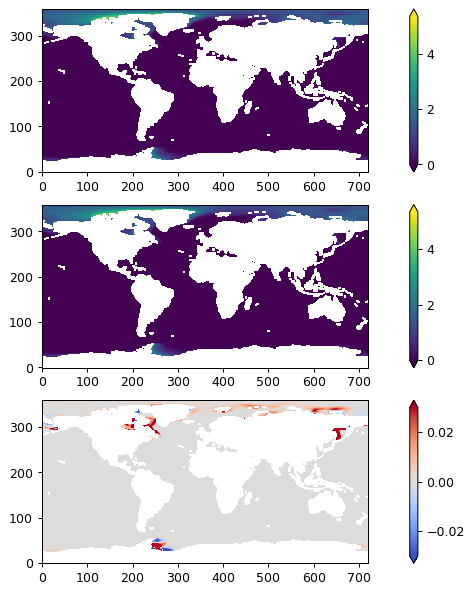

In [34]:
fig=plt.figure(figsize=(12,8), dpi= 90)
ax=fig.add_subplot(3,1,1)
m=ax.imshow(si_pre_latlon[2,:,:],origin='lower')
fig.colorbar(m,extend='both',orientation='vertical')
ax2=fig.add_subplot(3,1,2)
m2=ax2.imshow(si_int_latlon[2,:,:],origin='lower')
fig.colorbar(m2,extend='both',orientation='vertical')
ax3=fig.add_subplot(3,1,3)
m3=ax3.imshow(si_diff[2,:,:],origin='lower',cmap='coolwarm',vmin=-0.03,vmax=0.03)
fig.colorbar(m3,extend='both',orientation='vertical')